In [39]:
#Import necessary libraries

import pandas as pd
import math
import scipy as sp
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mpdt

In [2]:
data_january = pd.read_csv('Downloads/fhv_tripdata_2017-01.csv')

/home/guido/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_february = pd.read_csv('Downloads/fhv_tripdata_2017-02.csv')

In [4]:
data_january = data_january.drop(['DropOff_datetime'],axis=1)

In [5]:
data_january = data_january.drop(['PUlocationID'],axis=1)

In [6]:
data_january = data_january.drop(['DOlocationID'],axis=1)

In [7]:
data_february = data_february.drop(['DropOff_datetime'],axis=1)
data_february = data_february.drop(['PUlocationID'],axis=1)
data_february = data_february.drop(['DOlocationID'],axis=1)

In [8]:
joint_data = data_january.append(data_february)

In [9]:
joint_data['Dispatching_base_num'] = joint_data['Dispatching_base_num'].apply(lambda x: str.upper(str(x)))

In [10]:
company_codes = pd.read_csv('ride_sharing_codes.csv')

In [11]:
uber_lyft_data = joint_data[joint_data['Dispatching_base_num'].isin(company_codes['Code'])==True]

In [12]:
uber_lyft_data['company'] = uber_lyft_data['Dispatching_base_num'].apply(lambda x: 'lyft' if x== 'B02844' or x == 'B02510' else 'uber')

/home/guido/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
uber_lyft_data['date'] = uber_lyft_data['Pickup_DateTime'].apply(lambda x: str(x)[:10])

/home/guido/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
uber_data = uber_lyft_data[uber_lyft_data['company']=='uber']

In [24]:
lyft_data = uber_lyft_data[uber_lyft_data['company']=='lyft']

In [25]:
uber_counts = uber_data['date'].value_counts().sort_index()

In [26]:
uber_counts = pd.DataFrame(uber_counts)

In [27]:
uber_counts.columns = ['uber']

In [30]:
lyft_counts = lyft_data['date'].value_counts().sort_index()

In [31]:
lyft_counts = pd.DataFrame(lyft_counts)

In [32]:
lyft_counts.columns = ['lyft']

In [33]:
total_rides_per_day = pd.DataFrame()
total_rides_per_day['uber'] = uber_counts['uber']
total_rides_per_day['lyft'] = lyft_counts['lyft']

In [34]:
total_rides_per_day['share_uber'] = total_rides_per_day['uber']/(total_rides_per_day['uber']+total_rides_per_day['lyft'])

In [35]:
total_rides_per_day['share_lyft'] = total_rides_per_day['lyft']/(total_rides_per_day['uber']+total_rides_per_day['lyft'])

/home/guido/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


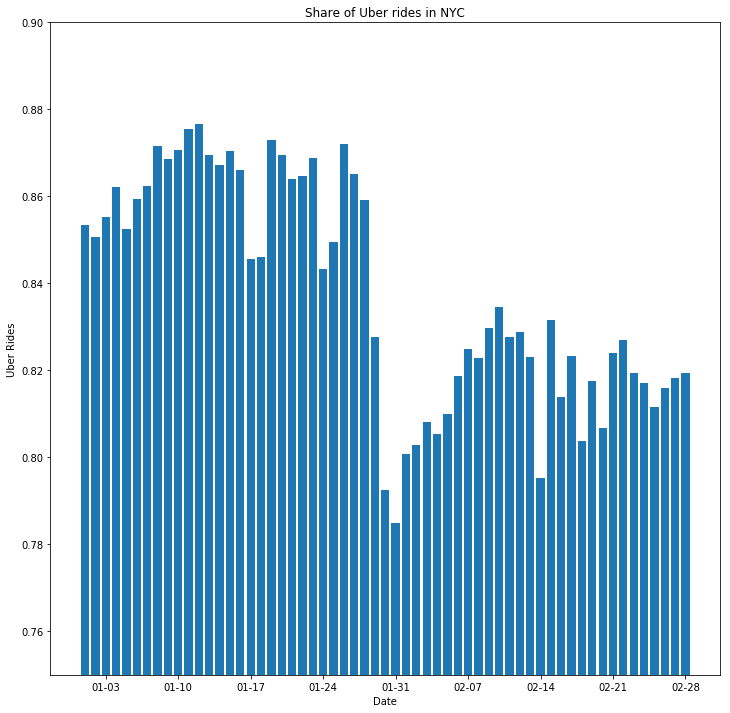

In [40]:
fig, ax = plt.subplots(figsize=(12, 12))

# Add x-axis and y-axis
ax.bar(matplotlib.dates.datestr2num(total_rides_per_day.index), total_rides_per_day['share_uber'])
ax.xaxis_date()
ax.set_ylim([.75,.90])
# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Uber Rides",
       title="Share of Uber rides in NYC")

# Define the date format
date_form = mpdt.DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)

plt.show()